In [1]:
! pip3 install -U nlplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 967.9/967.9 KB 6.1 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: nlplot
    Found existing installation: nlplot 1.5.0
    Uninstalling nlplot-1.5.0:
      Successfully uninstalled nlplot-1.5.0
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [2]:
! pip show nlplot

Name: nlplot
Version: 1.6.0
Summary: Visualization Module for Natural Language Processing
Home-page: https://github.com/takapy0210/nlplot
Author: Takanobu Nozawa
Author-email: takanobu.030210@gmail.com
License: MIT License
Location: /usr/local/lib/python3.8/site-packages
Requires: ipython, matplotlib, networkx, numpy, pandas, pillow, plotly, scikit-learn, seaborn, tqdm, wordcloud
Required-by: 


In [3]:
import numpy as np
import pandas as pd
import nlplot
import plotly
from plotly.subplots import make_subplots
from plotly.offline import iplot
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)
pd.options.display.float_format = '{:.3f}'.format
pd.set_option('display.max_colwidth', 5000)

%matplotlib inline

In [4]:
df = pd.read_csv('sample_twitter.csv')

In [5]:
df.sample(10)

searched_for  \
698   #データサイエンティスト   
1237  #データサイエンティスト   
1781       #kaggle   
849   #データサイエンティスト   
1403  #データサイエンティスト   
51    #データサイエンティスト   
439   #データサイエンティスト   
1087  #データサイエンティスト   
2200       #kaggle   
418   #データサイエンティスト   

                                                           hashtags  
698                                   食品ロス 食品廃棄物 日経ビジネス データサイエンティスト  
1237                 データマイニング バックオフィス 求人 マーケティング データサイエンティスト 東京都渋谷区  
1781  logisticregression categoricalfeatureencodingchallenge kaggle  
849                           ビジネス統計 データ分析 データサイエンス データサイエンティスト 統計学  
1403        インターンシップ インターン マーケティング データサイエンス データサイエンティスト 統計学 時給1000円  
51                                          統計学 ai gafa データサイエンティスト  
439                                     九州ai勉強会 機械学習 関東 データサイエンティスト  
1087                   市場価値 プロ集団 主婦 データサイエンティスト 勉強会 チャットボット 学ぶ姿勢 ai  
2200                                    kaggle mercari deeplearning  
418                         目標 データサイエンティスト 立て直し datascientist ブログ更新

In [6]:
display(df.head(3), df.tail(3), df.shape)

searched_for                                 hashtags
0  #データサイエンティスト  筋トレ 今日の積み上げ 駆け出しエンジニアと繋がりたい データサイエンティスト
1  #データサイエンティスト      統計学 人工知能 ダイヤモンド データサイエンティスト プログラミング
2  #データサイエンティスト            データマイニング データサイエンス データサイエンティスト

searched_for                   hashtags
2710      #kaggle  featureengineering kaggle
2711      #kaggle   superintelligence kaggle
2712      #kaggle             titanic kaggle

(2713, 2)

# use nlplot

In [7]:
# 全データ・#データサイエンティストをそれぞれインスタンス化
npt = nlplot.NLPlot(df, target_col='hashtags')
npt_ds = nlplot.NLPlot(df.query('searched_for == "#データサイエンティスト"'), target_col='hashtags')
npt_kaggle = nlplot.NLPlot(df.query('searched_for == "#kaggle"'), target_col='hashtags')

## ストップワードの計算

In [8]:
# top_nで頻出上位単語, min_freqで頻出下位単語を指定できる
# 今回は上位2単語（データサイエンティスト・kaggle）をストップワードに指定
stopwords = npt.get_stopword(top_n=2, min_freq=0)

In [9]:
stopwords

['データサイエンティスト', 'kaggle']

## n-grams

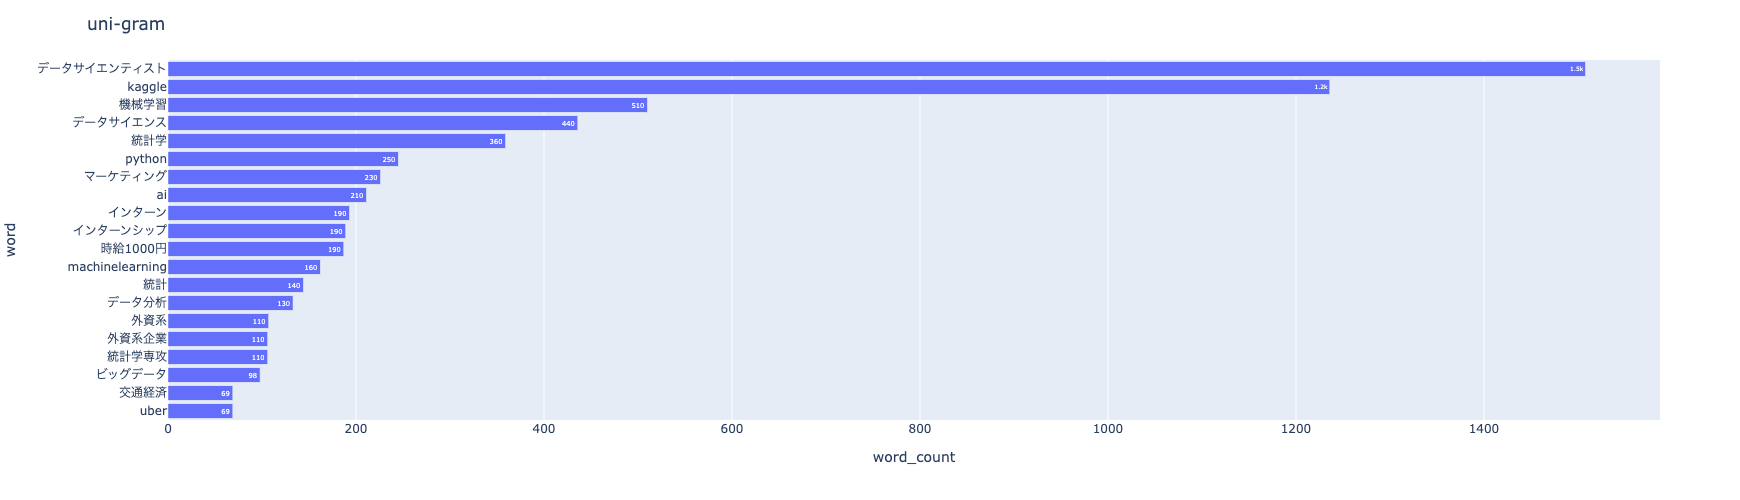

In [10]:
fig_unigram = npt.bar_ngram(
    title='uni-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=1,
    top_n=20,
    width=800,
    height=500,
    verbose=False,
)

fig_unigram.show()

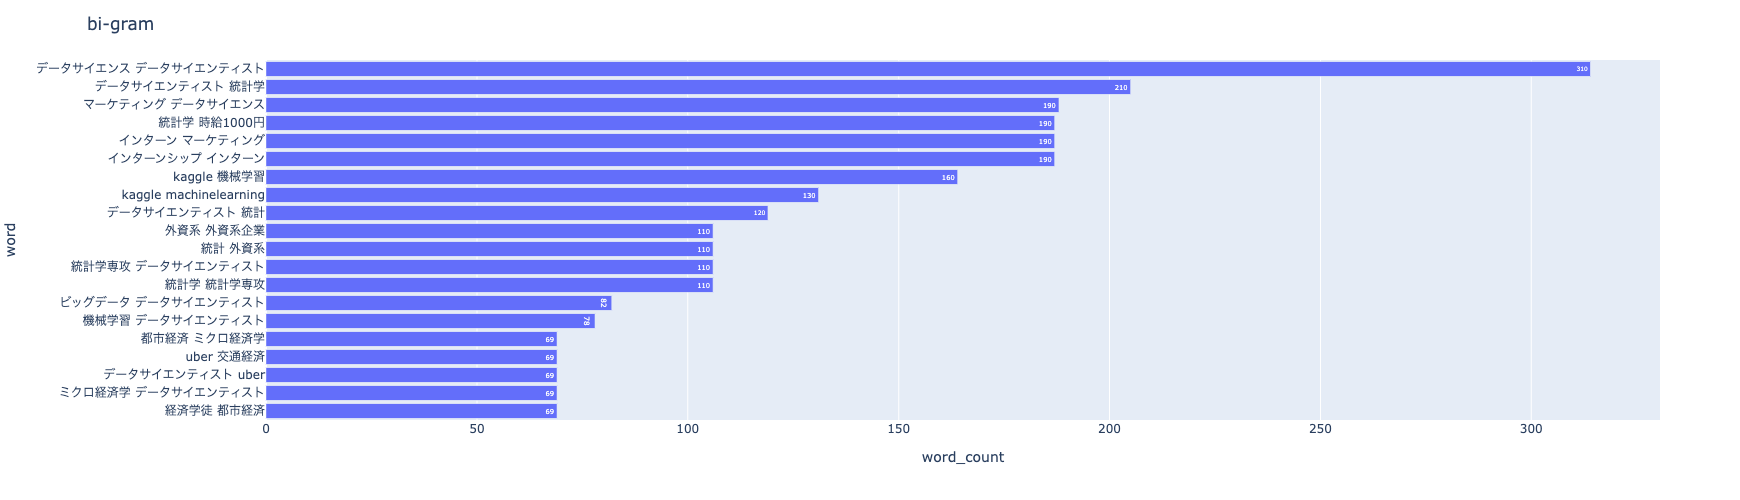

In [11]:
fig_bigram = npt.bar_ngram(
    title='bi-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=2,
    top_n=20,
    width=800,
    height=500,
    verbose=False,
)

fig_bigram.show()

### ２つを比較

In [12]:
# kaggleデータ
fig_unigram_kaggle = npt_kaggle.bar_ngram(
    title='uni-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=1,
    top_n=30,
    verbose=False,
)

# データサイエンティストデータ
fig_unigram_ds = npt_ds.bar_ngram(
    title='uni-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=1,
    top_n=30,
    verbose=False,
)

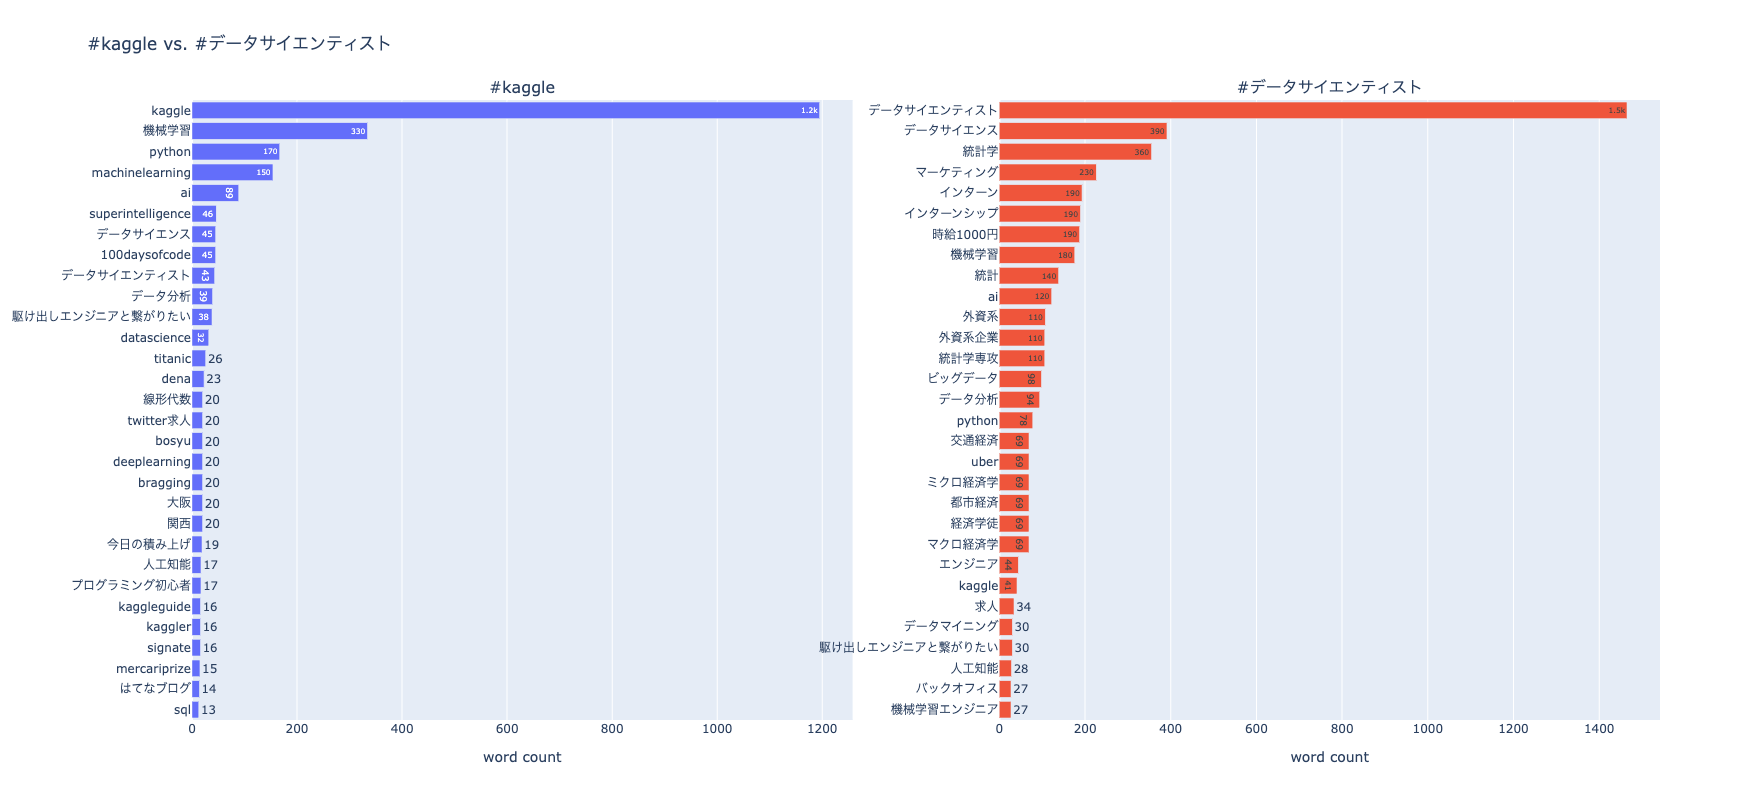

In [13]:
# subplot
trace1 = fig_unigram_kaggle['data'][0]
trace2 = fig_unigram_ds['data'][0]

fig = make_subplots(rows=1, cols=2, subplot_titles=('#kaggle', '#データサイエンティスト'), shared_xaxes=False)
fig.update_xaxes(title_text='word count', row=1, col=1)
fig.update_xaxes(title_text='word count', row=1, col=2)

fig.update_layout(height=800, width=1700, title_text='#kaggle vs. #データサイエンティスト')
fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=1, col=2)

# plotly.offline.plot(fig, filename='unigram #全てvs#kaggle.html', auto_open=False)

fig.show()

## 単語出現頻度の分布

In [14]:
# 単語数の分布
fig_histgram = npt.word_distribution(
    title='word histgram',
    xaxis_label='count',
    yaxis_label='',
    width=1000,
    height=500,
)

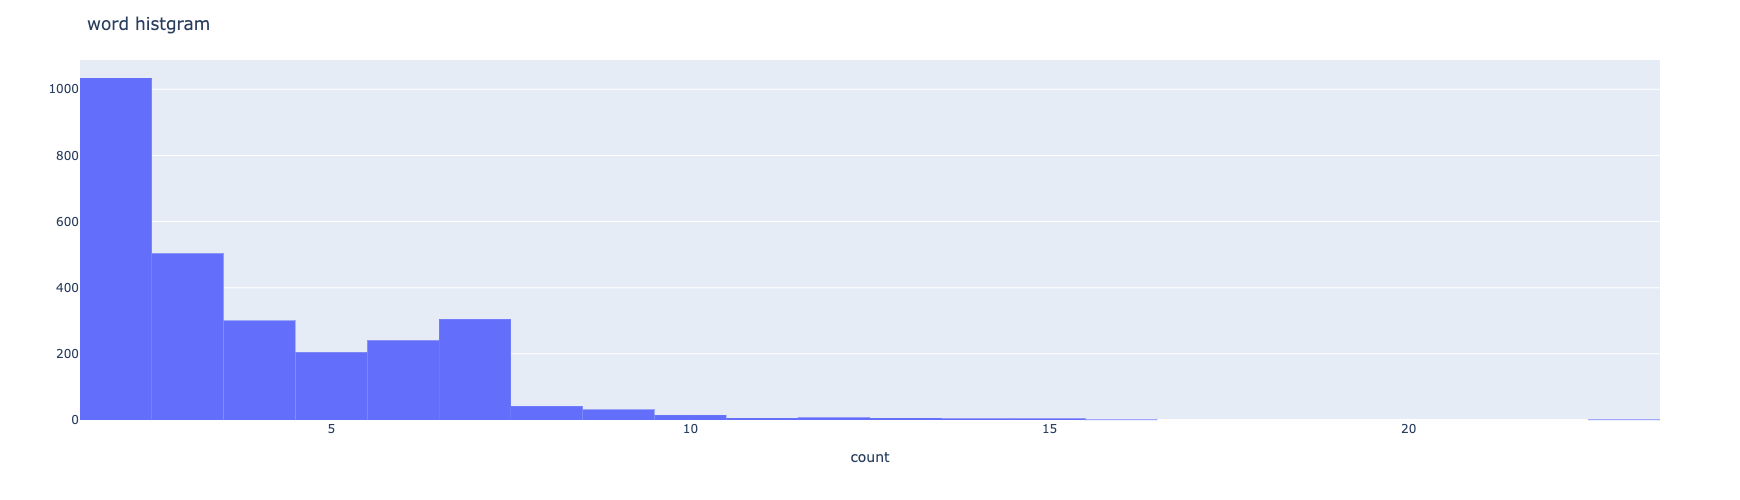

In [15]:
fig_histgram.show()

## ラベル毎

In [16]:
fig_wd_ds = npt_ds.word_distribution(
    title='number of words distribution',
    xaxis_label='length',
    yaxis_label='',
    width=1000,
    height=500,
    color=None,
    template='plotly',
    bins=None,
    save=False,
)

fig_wd_kaggle = npt_kaggle.word_distribution(
    title='number of words distribution',
    xaxis_label='length',
    yaxis_label='',
    width=1000,
    height=500,
    color=None,
    template='plotly',
    bins=None,
    save=False,
)

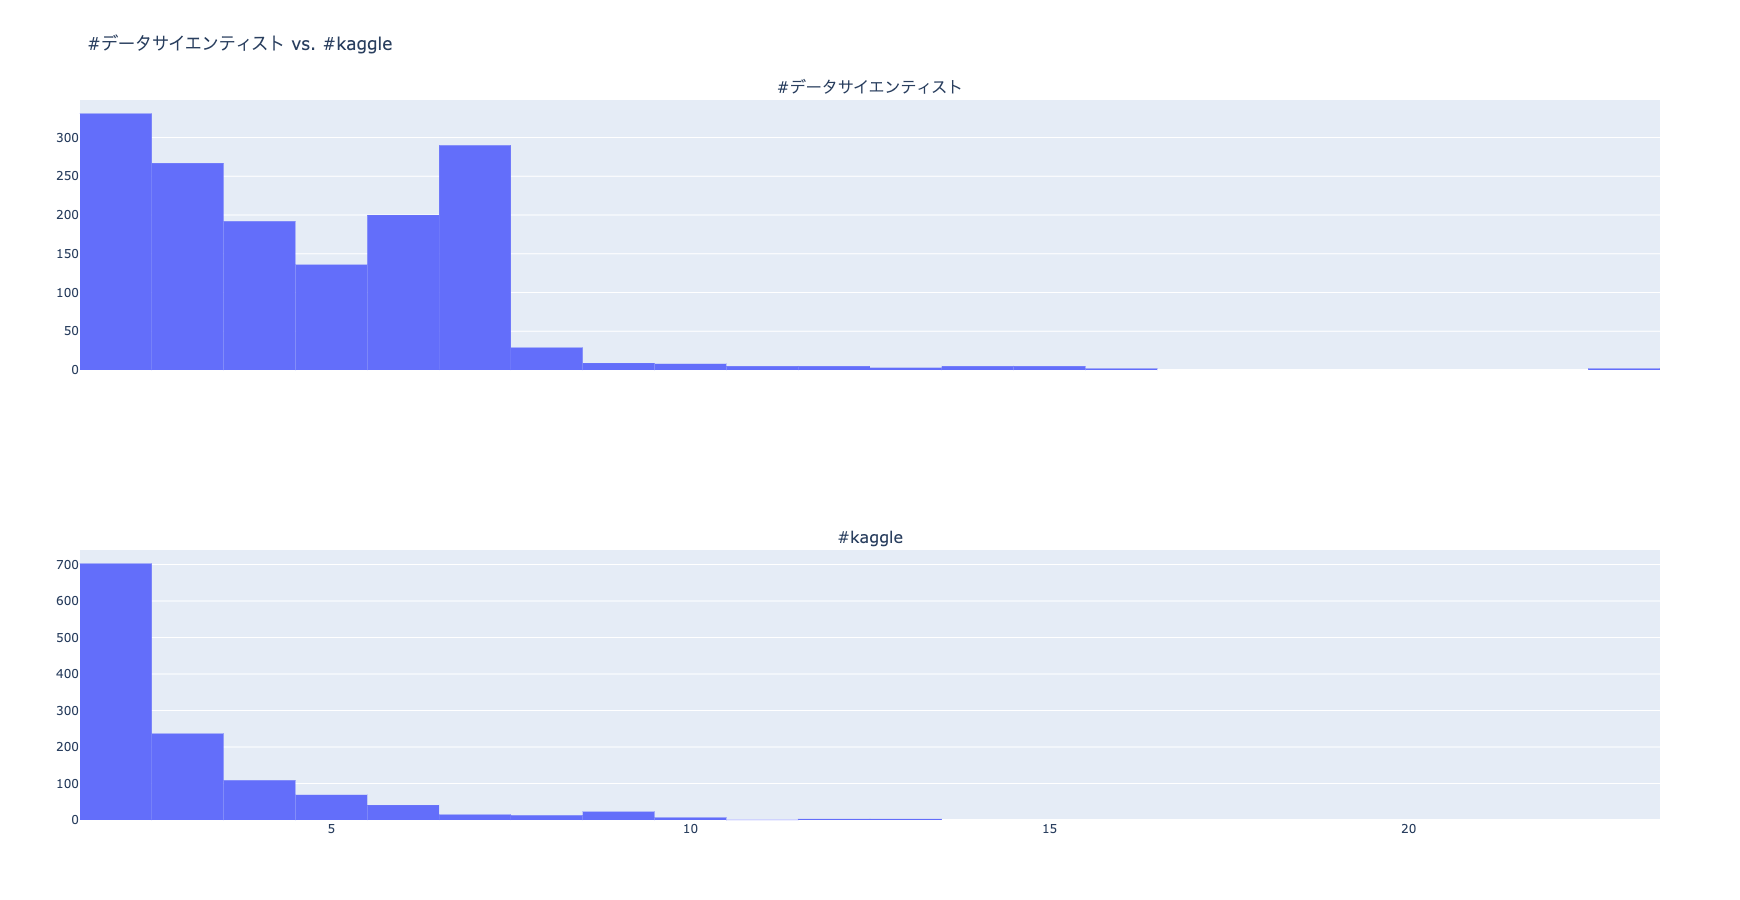

In [17]:
trace1 = fig_wd_ds['data'][0]
trace2 = fig_wd_kaggle['data'][0]

fig = make_subplots(rows=2, cols=1, subplot_titles=('#データサイエンティスト', '#kaggle'), shared_xaxes=True)

fig.update_layout(height=900, width=1200, title_text='#データサイエンティスト vs. #kaggle')
fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=2, col=1)

# 保存する場合
# plotly.offline.plot(fig, filename='words distribution #データサイエンティストvs#kaggle.html', auto_open=False)

fig.show()

## tree map

In [18]:
fig_treemap = npt.treemap(
    stopwords=stopwords,
    title='Tree map',
    ngram=1,
    top_n=50,
    width=1300,
    height=600,
    verbose=False,
    save=False
)

/usr/local/lib/python3.8/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



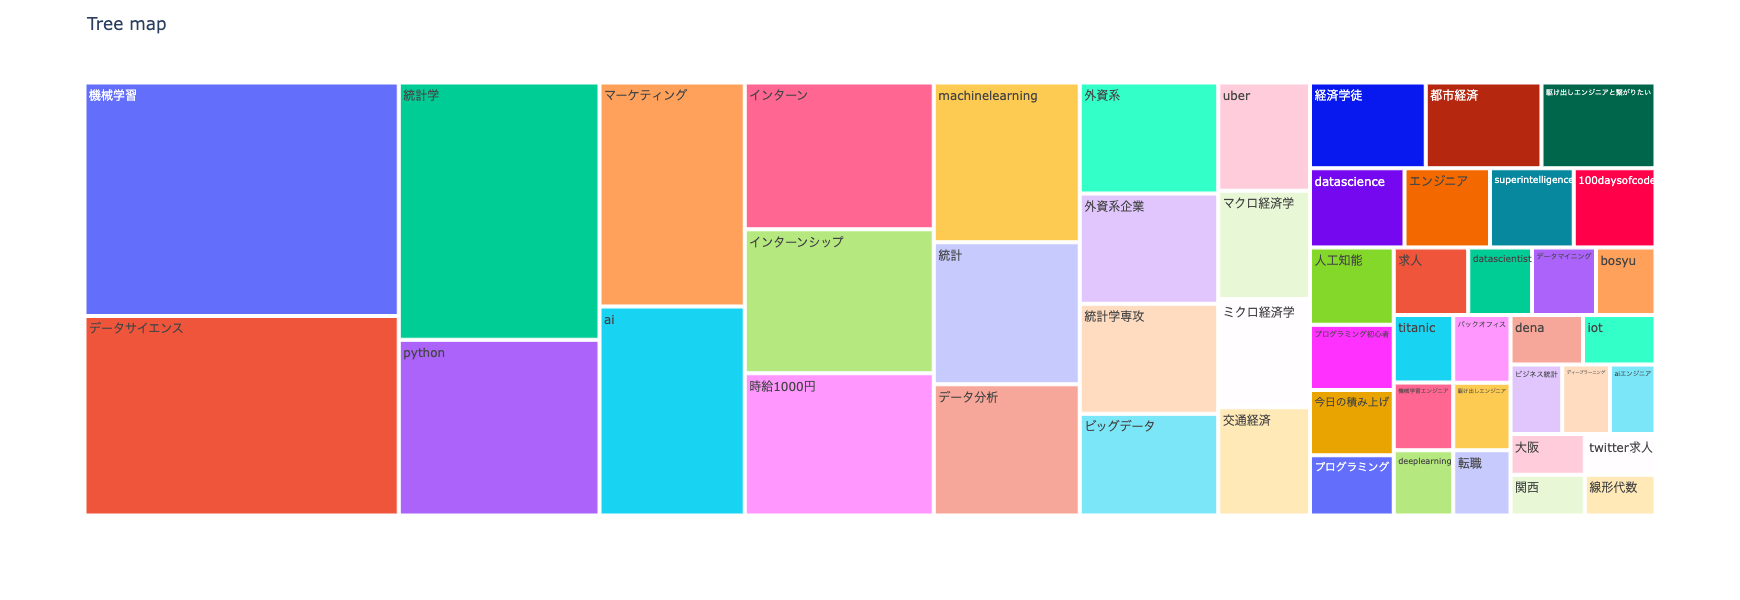

In [19]:
fig_treemap.show()

## word cloud

In [20]:
fig_wc = npt.wordcloud(
    width=1000,
    height=600,
    max_words=100,
    max_font_size=100,
    colormap='tab20_r',
    mask_file=None,
    save=False
)

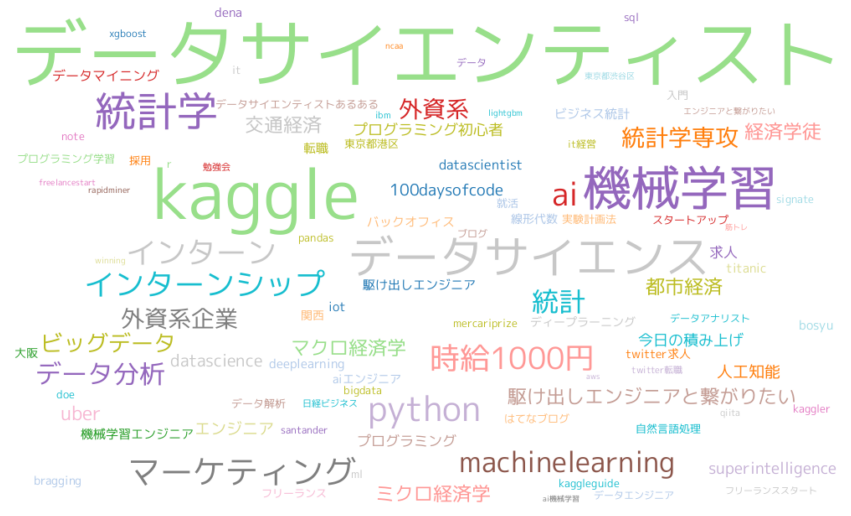

In [21]:
plt.figure(figsize=(15, 25))
plt.imshow(fig_wc, interpolation="bilinear")
# plt.tight_layout()
plt.axis("off")
plt.show()

## 共起ネットワーク

In [22]:
npt.build_graph(stopwords=stopwords, min_edge_frequency=11)
npt_ds.build_graph(stopwords=stopwords, min_edge_frequency=7)
npt_kaggle.build_graph(stopwords=stopwords, min_edge_frequency=5)

node_size:48, edge_size:96
node_size:47, edge_size:100
node_size:42, edge_size:105


In [23]:
# グラフの元となるデータフレーム 
display(
    npt.node_df.head(), npt.node_df.shape,
    npt.edge_df.head(), npt.edge_df.shape
)

id  id_code  adjacency_frequency  betweeness_centrality  \
0              統計学        0                   11                  0.190   
1  データサイエンティストあるある        1                    1                  0.000   
2         インターンシップ        2                    5                  0.000   
3               統計        3                    4                  0.000   
4             dena        4                    1                  0.000   

   clustering_coefficient  community  
0                   0.327          1  
1                   0.000          1  
2                   1.000          1  
3                   1.000          1  
4                   0.000          0

(48, 6)

source    target  edge_frequency  source_code  target_code
0  データサイエンス       統計学             225           24            0
1     インターン  データサイエンス             188            9           24
2   マーケティング       統計学             188           32            0
3  データサイエンス   マーケティング             188           24           32
4   マーケティング   時給1000円             187           32           46

(96, 5)

In [24]:
fig_co_network = npt.co_network(
    title='Co-occurrence network',
    sizing=100,
    node_size='adjacency_frequency',
    color_palette='hls',
    width=1100,
    height=700,
    save=False
)

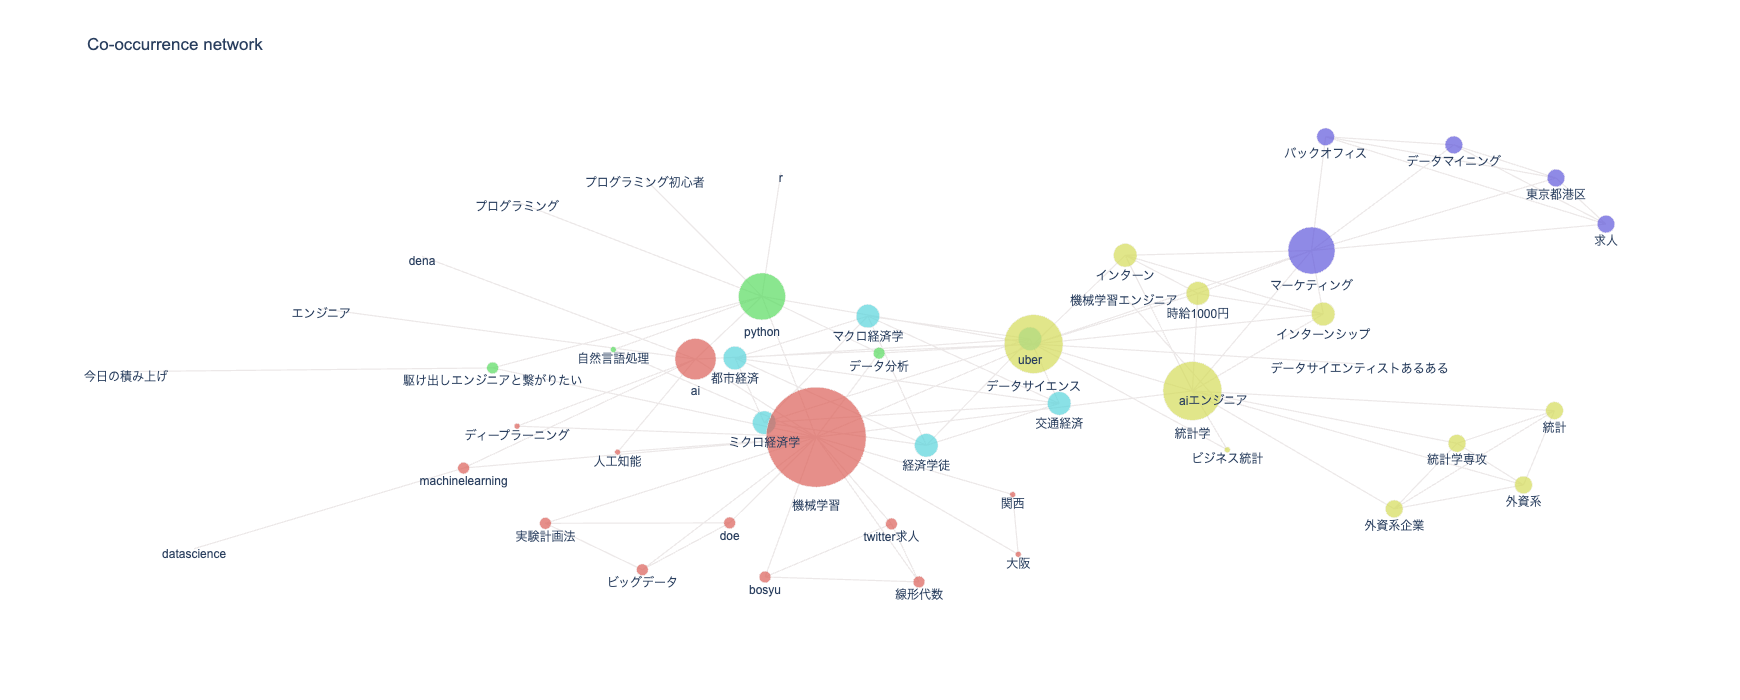

In [25]:
iplot(fig_co_network)

## sunburst

In [26]:
fig_sunburst = npt.sunburst(
    title='sunburst chart',
    colorscale=True,
    color_continuous_scale='Oryel',
    width=1000,
    height=800,
    save=False
)

/usr/local/lib/python3.8/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.8/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



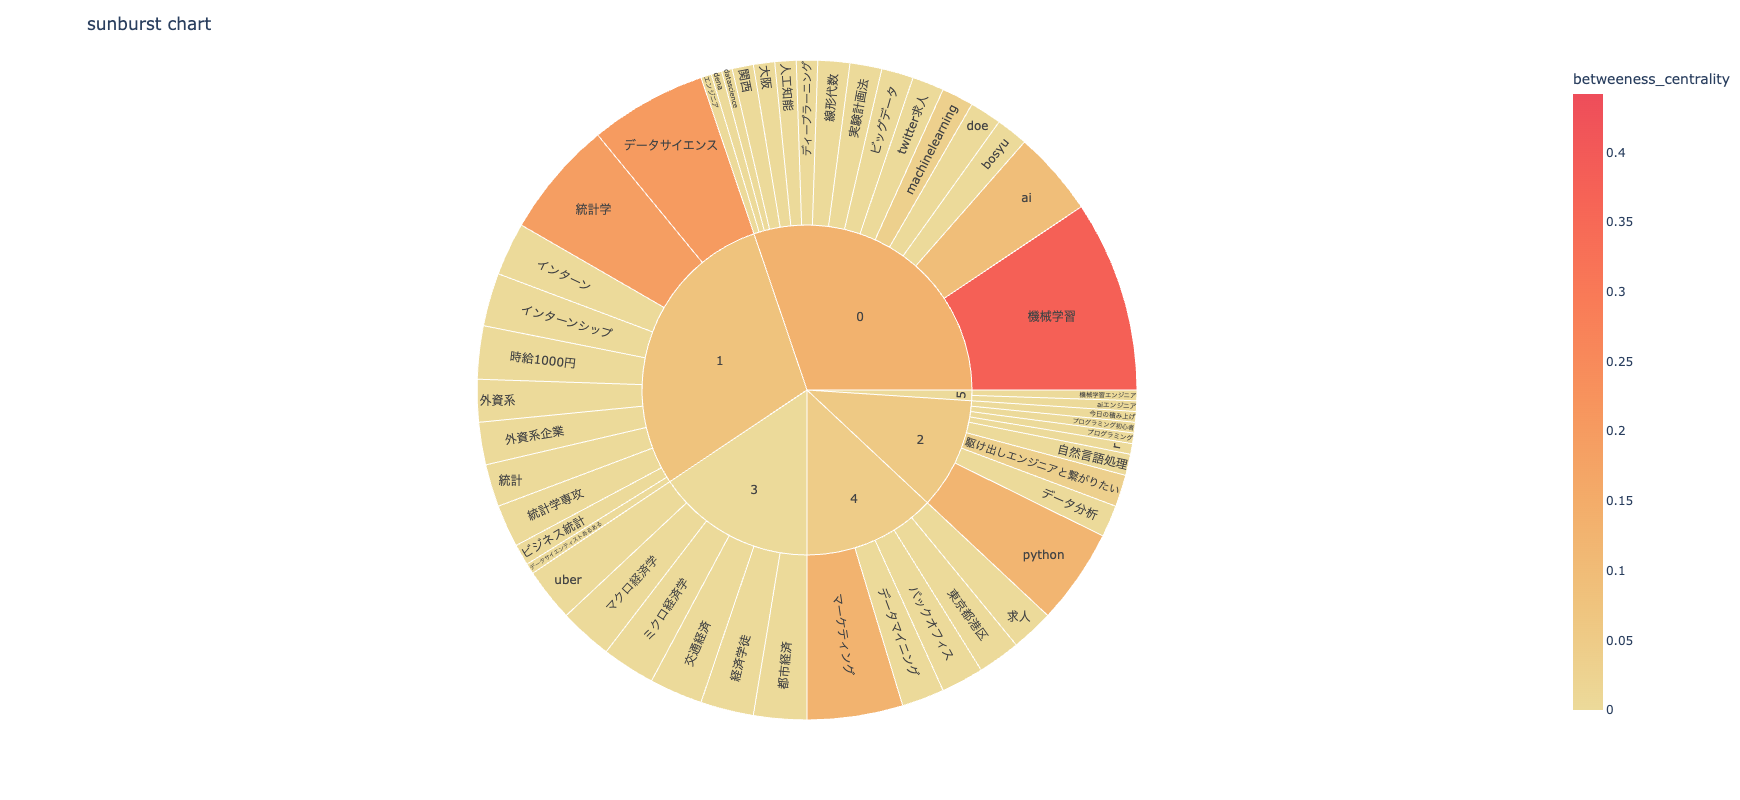

In [27]:
fig_sunburst.show()